In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [34]:
df = pd.read_csv(r"D:\Python 34\ML\titanic.csv")

In [35]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
df.shape

(891, 12)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

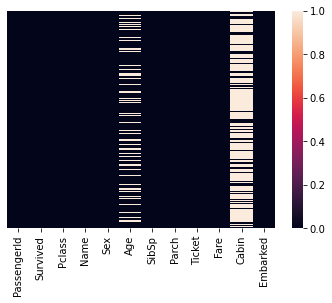

In [38]:
sns.heatmap(df.isnull(),yticklabels = False)

# finding null values

In [39]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [48]:
df['Survived'].value_counts()[0]+df['Survived'].value_counts()[1]

891

In [49]:
# Finding
#   1) Age having 177 null values
#   2) Cabin having 687 null values

<AxesSubplot:xlabel='Survived', ylabel='count'>

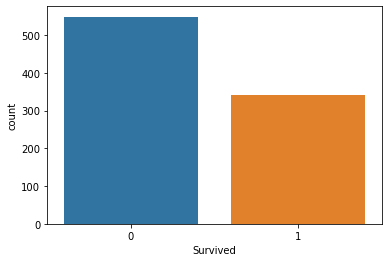

In [50]:
sns.countplot( x='Survived',data=df)

In [55]:
zero = (df['Survived'].value_counts()[0])/(df['Survived'].value_counts()[0]+df['Survived'].value_counts()[1])*100
zero

61.61616161616161

In [54]:
one = (df['Survived'].value_counts()[1])/(df['Survived'].value_counts()[0]+df['Survived'].value_counts()[1])*100
one

38.38383838383838

In [57]:
# hue

<AxesSubplot:xlabel='Survived', ylabel='count'>

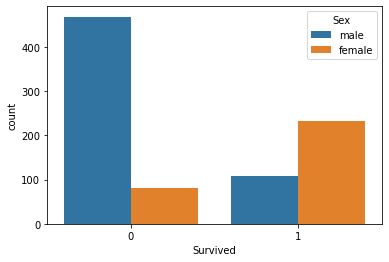

In [58]:
sns.countplot(x ='Survived',data=df,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

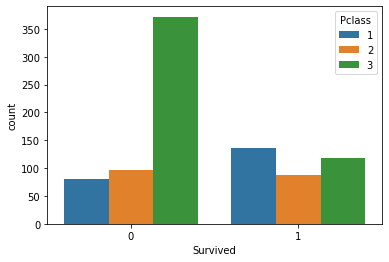

In [59]:
sns.countplot(x ='Survived',data=df,hue='Pclass')

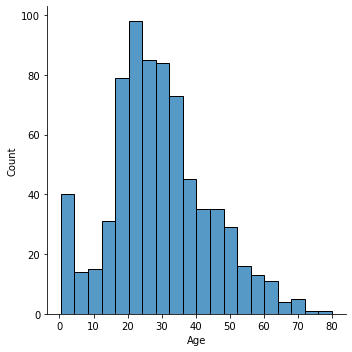

In [60]:
sns.displot(df['Age'].dropna())

<AxesSubplot:xlabel='SibSp', ylabel='count'>

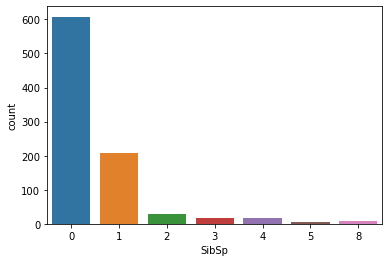

In [62]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:>

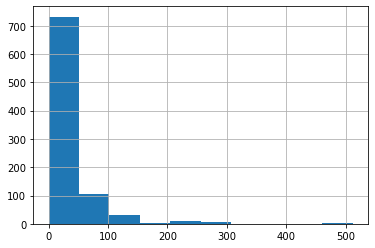

In [65]:
df['Fare'].hist()

In [68]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

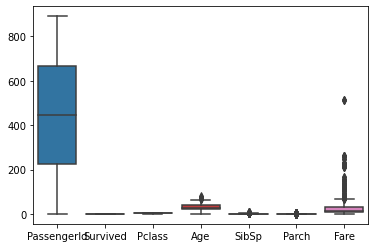

In [69]:
sns.boxplot(data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

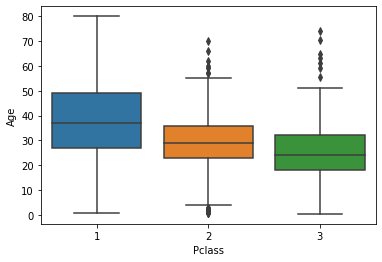

In [70]:
sns.boxplot(x = 'Pclass',y = 'Age',data=df)

<AxesSubplot:>

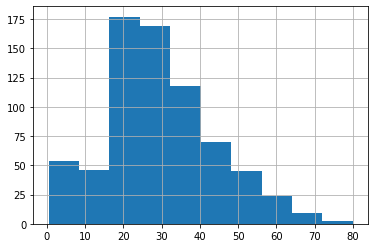

In [71]:
df['Age'].hist()

In [72]:
df[df['Pclass']==1]['Age'].median()

37.0

In [73]:
df[df['Pclass']==2]['Age'].median()

29.0

In [74]:
df[df['Pclass']==3]['Age'].median()

24.0

In [75]:
def impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [77]:
df['New_Age'] = df[['Age','Pclass']].apply(impute,axis=1)

In [78]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,24.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0


In [79]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Age
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,24.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,29.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,24.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,24.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,24.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,24.0
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,24.0
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,24.0


In [80]:
test = df[df['Age'].isnull()]

In [81]:
test[test['Pclass']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Age
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,37.0
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,37.0
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,37.0
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,37.0
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,37.0
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S,37.0
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C,37.0
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,37.0
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S,37.0
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C,37.0


In [82]:
pd.isnull(np.nan)

True

In [83]:
df.drop('Name',axis = 1,inplace =True)

In [86]:
df.drop('Ticket',axis = 1,inplace =True)

In [87]:
df.drop('Cabin',axis = 1,inplace =True)

In [91]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [92]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [93]:
embark =  pd.get_dummies(df['Embarked'],drop_first=True)

In [94]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [95]:
finaldf = pd.concat([df,sex,embark],axis=1)

In [96]:
finaldf

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Age,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,22.0,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,38.0,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,26.0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,35.0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,35.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,27.0,1,0,1
887,888,1,1,female,19.0,0,0,30.0000,S,19.0,0,0,1
888,889,0,3,female,NaN,1,2,23.4500,S,24.0,0,0,1
889,890,1,1,male,26.0,0,0,30.0000,C,26.0,1,0,0


In [97]:
finaldf.drop(columns = ['Sex','Embarked','Age'],inplace=True)

In [98]:
finaldf

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,New_Age,male,Q,S
0,1,0,3,1,0,7.2500,22.0,1,0,1
1,2,1,1,1,0,71.2833,38.0,0,0,0
2,3,1,3,0,0,7.9250,26.0,0,0,1
3,4,1,1,1,0,53.1000,35.0,0,0,1
4,5,0,3,0,0,8.0500,35.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,27.0,1,0,1
887,888,1,1,0,0,30.0000,19.0,0,0,1
888,889,0,3,1,2,23.4500,24.0,0,0,1
889,890,1,1,0,0,30.0000,26.0,1,0,0


In [99]:
x = finaldf.drop('Survived',axis=1)

In [100]:
x

,PassengerId,Pclass,SibSp,Parch,Fare,New_Age,male,Q,S
0,1,3,1,0,7.2500,22.0,1,0,1
1,2,1,1,0,71.2833,38.0,0,0,0
2,3,3,0,0,7.9250,26.0,0,0,1
3,4,1,1,0,53.1000,35.0,0,0,1
4,5,3,0,0,8.0500,35.0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,0,0,13.0000,27.0,1,0,1
887,888,1,0,0,30.0000,19.0,0,0,1
888,889,3,1,2,23.4500,24.0,0,0,1
889,890,1,0,0,30.0000,26.0,1,0,0


In [102]:
y= finaldf['Survived']

In [103]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=80)

In [106]:
x_train

,PassengerId,Pclass,SibSp,Parch,Fare,New_Age,male,Q,S
6,7,1,0,0,51.8625,54.0,1,0,1
95,96,3,0,0,8.0500,24.0,1,0,1
830,831,3,1,0,14.4542,15.0,0,0,0
57,58,3,0,0,7.2292,28.5,1,0,0
887,888,1,0,0,30.0000,19.0,0,0,1
...,...,...,...,...,...,...,...,...,...
818,819,3,0,0,6.4500,43.0,1,0,1
522,523,3,0,0,7.2250,24.0,1,0,0
211,212,2,0,0,21.0000,35.0,0,0,1
188,189,3,1,1,15.5000,40.0,1,1,0


In [107]:
from sklearn.linear_model import  LogisticRegression

In [110]:
model = LogisticRegression()

In [111]:
model.fit(x_train,y_train)

C:\Users\jangi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
y_pred = model.predict(x_test)

In [113]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0], dtype=int64)

In [114]:
y_test

155    0
459    0
309    1
595    0
449    1
      ..
129    0
396    0
849    1
138    0
826    0
Name: Survived, Length: 268, dtype: int64

In [118]:
from sklearn.metrics import classification_report,confusion_matrix

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       162
           1       0.75      0.60      0.67       106

    accuracy                           0.76       268
   macro avg       0.76      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



In [120]:
cm = confusion_matrix(y_test,y_pred)

In [121]:
cm

array([[141,  21],
       [ 42,  64]], dtype=int64)

# accuracy calculation

In [123]:
(141+64)/(141+21+42+64)

0.7649253731343284